In [1]:
import scipy
import numpy as np
import scipy.stats
import pandas as pd
import os

import matplotlib.pylab as plt
%matplotlib inline

In [2]:
os.getenv("PUIDATA")

'/Users/apple/Desktop/PUI2017/PUIdata'

# 0. data cleaning

### the first dataset 'World firearms murders and ownership' of 2012

In [3]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + 'World firearms murders and ownership - Sheet 1.csv')
df1.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [4]:
print(df1.shape)

(185, 9)


In [5]:
df1 = df1.drop(labels = ['ISO code', 'Source'], axis = 1)
df1 = df1.rename(columns = {'Country/Territory': 'Country'})

### the second dataset 'The number of gun owned vs. the number of mass shootings' (see: [here](https://datawrapper.dwcdn.net/pvLFI/4/))

In [6]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + 'data-pvLFI.csv')
df2.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [7]:
df2.shape

(25, 3)

In [8]:
df2[df2['Country'].isin(df1['Country'])==0]

,Country,Guns/100 inhabitants,Number of mass shootings
2,Beligium,17.2,2
9,Holland,3.9,2
23,United Kingdom,6.2,3


### why these 3 countries are not in df1? we need to find out

In [9]:
df1[df1['Country'].str.contains('England')]

,Country,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
52,England and Wales,6.6,41.0,0.07,88.0,6.2,3400000.0


In [10]:
df1[df1['Country'].str.contains('Scotland')]

,Country,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
145,Scotland,NaN,NaN,NaN,93.0,5.5,280000.0


In [11]:
df1[df1['Country'].str.contains('Net')]

,Country,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
121,Netherlands,30.7,55.0,0.33,112.0,3.9,510000.0


In [12]:
df1[df1['Country'].str.contains('Belgium')]

,Country,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
14,Belgium,39.5,70.0,0.68,34.0,17.2,1800000.0


### From above, we could know that the 3 missing countries are UK, Netherlands and Belgium, which are all in df1.
### and because the 'Average firearms per 100 people' of 'England and Wales' in df1 exactly = df2, so we consider that is the data of  'England and Wales' not 'United Kingdoms'(also with scotland)
### we replace the countries' name and merge df1 and df2

In [13]:
df2.replace(['Beligium', 'Holland', 'United Kingdom'],['Belgium','Netherlands', 'England and Wales'], 
            inplace = True)
df3 = pd.merge(df1, df2, how = 'inner')
df3.shape

(25, 9)

In [14]:
## to check does the column 'Average firearms per 100 people' and 'Guns/100 inhabitants' exactly the same
sum(df3['Average firearms per 100 people'] != df3['Guns/100 inhabitants'])

0

In [15]:
## the answer is yes, so we delete one column
df3 = df3.drop(labels = ['Guns/100 inhabitants'], axis = 1)
df3 = df3.rename(columns = {'Average firearms per 100 people': 'Firearms per 100 people'})
df3.head()

,Country,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Firearms per 100 people,Average total all civilian firearms,Number of mass shootings
0,Australia,11.5,30.0,0.14,42.0,15.0,3050000.0,4
1,Austria,29.5,18.0,0.22,14.0,30.4,2500000.0,1
2,Belgium,39.5,70.0,0.68,34.0,17.2,1800000.0,2
3,Canada,32.0,173.0,0.51,13.0,30.8,9950000.0,4
4,Denmark,31.9,15.0,0.27,54.0,12.0,650000.0,0


# 2. plot the average number of civilian fire arms per person
first without errors, then with errors. are there points that look like outliers?

In [16]:
firearms_100 = df1['Average firearms per 100 people'].dropna()
len(firearms_100)

176

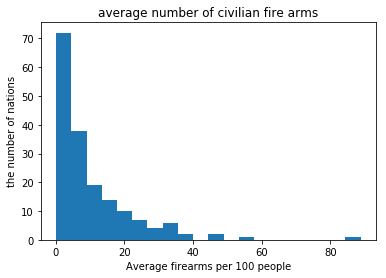

In [17]:
plt.hist(firearms_100, bins = 20)
plt.title('average number of civilian fire arms')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('the number of nations')

### there are outlier larger than 80 per 100 people , we could filter it out

In [18]:
df1[df1['Average firearms per 100 people'] > 40]

,Country,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
58,Finland,19.8,24.0,0.45,4.0,45.3,2400000.0
162,Switzerland,72.2,57.0,0.77,3.0,45.7,3400000.0
176,United States,60.0,9146.0,2.97,1.0,88.8,270000000.0
182,Yemen,NaN,NaN,NaN,2.0,54.8,11500000.0


### from the table below, we could see the outlier is United States with 89 average firearms per 100 people, much larger than the second one Yemen with 55

# 3.plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

## 3.1 average number of homicide by fire arms per person

In [19]:
homicide_100000 = df1['Homicide by firearm rate per 100,000 pop'].dropna()
len(homicide_100000)

116

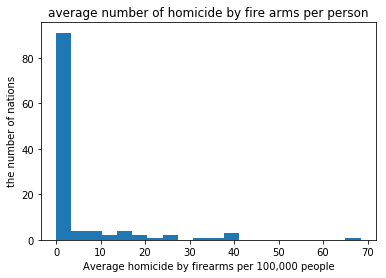

In [20]:
plt.hist(homicide_100000, bins = 20)
plt.title('average number of homicide by fire arms per person')
plt.xlabel('Average homicide by firearms per 100,000 people')
plt.ylabel('the number of nations')

### there are outlier larger than 50 homicide by firearms per 100,000 people , we could filter it out


In [21]:
df1[df1['Homicide by firearm rate per 100,000 pop'] > 30]

,Country,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
51,El Salvador,76.9,2446.0,39.90,92.0,5.8,400000.0
67,Guatemala,84.0,5009.0,34.81,49.0,13.1,1650000.0
72,Honduras,83.4,5201.0,68.43,88.0,6.2,500000.0
83,Jamaica,75.6,1080.0,39.40,74.0,8.1,215000.0
142,Saint Kitts and Nevis,85.0,17.0,32.44,NaN,NaN,NaN
179,Venezuela,79.5,11115.0,38.97,59.0,10.7,2850000.0


## from the table below, we could see the outlier is Honduras with 68 homicide by firearms per 100,000 people, while others are all below 40

## 3.2 average number of homicide by fire arms per person vs GDP

# 4.plot the number of  homicides by fire arm against the number of civilian firearms. (plot the  US in a different color)
with and without errorbars

In [22]:
f_h = df1[['Country','Average firearms per 100 people','Homicide by firearm rate per 100,000 pop']].dropna()

In [23]:
len(f_h)

107

In [24]:
f_h = f_h.rename(columns = {'Average firearms per 100 people':'x','Homicide by firearm rate per 100,000 pop':'y'})

In [25]:
f_h.head()

,Country,x,y
0,Albania,8.6,1.76
1,Algeria,7.6,0.06
4,Argentina,10.2,3.02
5,Armenia,12.5,0.29
6,Australia,15.0,0.14


In [26]:
f_h_us = f_h[f_h['Country'] == 'United States']
f_h_us

,Country,x,y
176,United States,88.8,2.97


### without errorbars

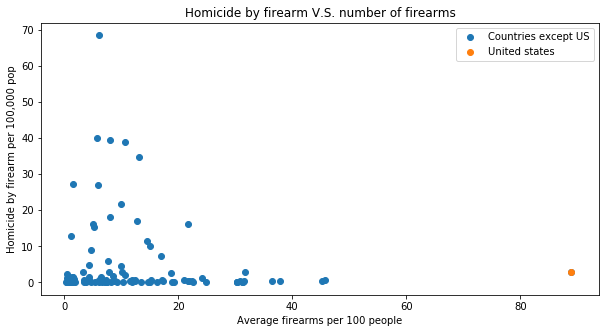

In [27]:
plt.figure(figsize = (10,5))
plt.scatter(f_h.x, f_h.y, label = 'Countries except US')
plt.scatter(f_h_us.x, f_h_us.y, label = 'United states')
plt.title('Homicide by firearm V.S. number of firearms')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('Homicide by firearm per 100,000 pop')
plt.legend()

### with errorbars

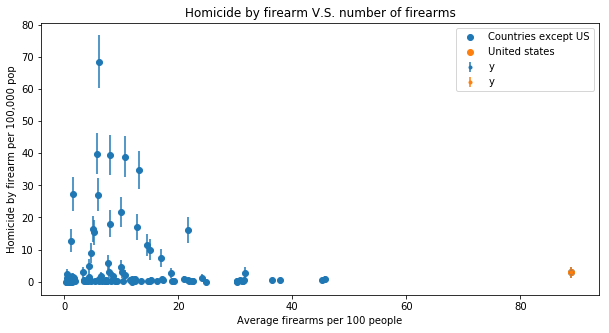

In [28]:
plt.figure(figsize = (10,5))
plt.scatter(f_h.x, f_h.y, label = 'Countries except US')
plt.scatter(f_h_us.x, f_h_us.y, label = 'United states')
plt.title('Homicide by firearm V.S. number of firearms')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('Homicide by firearm per 100,000 pop')

plt.errorbar(f_h.x, f_h.y, yerr = np.sqrt(f_h.y), fmt = '.') 
plt.errorbar(f_h_us.x, f_h_us.y, yerr = np.sqrt(f_h_us.y), fmt = '.') 
plt.legend()